In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import jit  # makes things faster
import sys  # add spocc directory to path
import os
from EightBitTransit.eightbitref import transit_model



    NvvmSupportError: libNVVM cannot be found. Do `conda install cudatoolkit`:
    libnvvm.so: cannot open shared object file: No such file or directory

    Initializing EightBitTransit *without* gpu multiprocessing.
    


# Generate reference signal

In [3]:
model = transit_model(
    imfile="./ShadowImagingTitle.png",
    lowres=20,
    lowrestype="mean",
    lowresround=False,
)
model_LC = model.gen_ref_LC() # also accessible by model.ref_LC once run

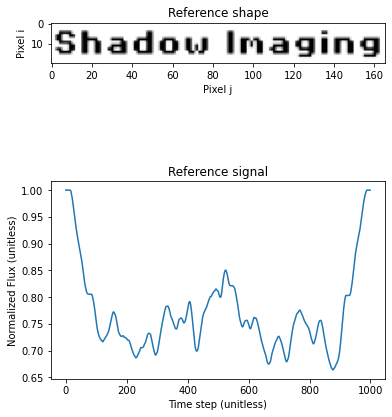

In [11]:
fig, ax = plt.subplots(2, figsize=(6,8), gridspec_kw={"height_ratios":[1,1]})
ax[0].imshow(model.opacitymat, cmap="Greys")
ax[0].set_title("Reference shape");
ax[0].set_xlabel("Pixel j");
ax[0].set_ylabel("Pixel i");

ax[1].plot(model_LC)
ax[1].set_title("Reference signal");
ax[1].set_xlabel("Time step (unitless)");
ax[1].set_ylabel("Normalized Flux (unitless)");


# Import some random light curves

In [15]:
lcc_random = loaders.LightCurveCollection(random_ref)

In [28]:
lcc_random[0].to_csv("S18TIC230021516.csv")

In [29]:
lcc_random[1].to_csv("S18TIC426153813.csv")

In [30]:
lcc_random[2].to_csv("S18320608469.csv")

## Example 1 

In [34]:
lc = pd.read_csv("./lightcurves/S18TIC230021516.csv")
time = lc.time
flux = lc.flux

In [41]:
signal = model.signal_fit(time.values, 1.1, 0.2, time.values[600])

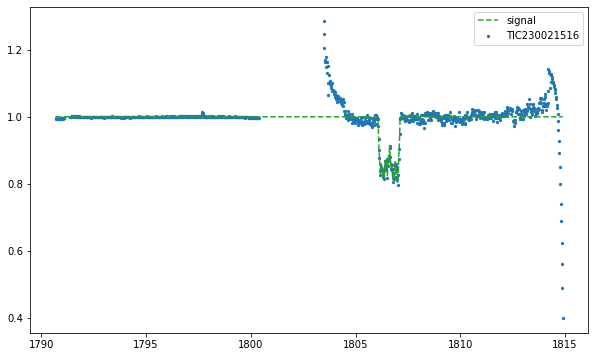

In [47]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(time, signal, linestyle="--", label="signal", c="tab:green")
ax.scatter(time, (flux+signal-1), s=5, label="TIC230021516")
plt.legend()

## Example 2

In [50]:
lc = pd.read_csv("./lightcurves/S18TIC426153813.csv")
time = lc.time
flux = lc.flux

In [51]:
signal = model.signal_fit(time.values, 3., 0.8, time.values[200])

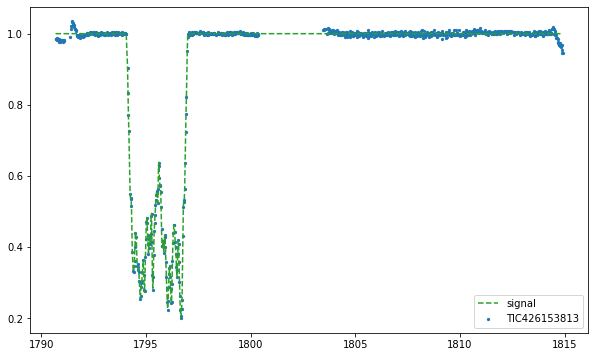

In [52]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(time, signal, linestyle="--", label="signal", c="tab:green")
ax.scatter(time, (flux+signal-1), s=5, label="TIC426153813")
plt.legend()

## Try it yourself

In [53]:
lc = pd.read_csv("./lightcurves/S18TIC320608469.csv")
time = lc.time
flux = lc.flux

In [ ]:
width = 
depth = 
tref = 
signal = model.signal_fit(time.value, width, depth, tref)

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,6))
(lc+signal-1).plot(ax=ax)
ax.plot(lc.time.value, signal, linestyle="--", label="model")
plt.legend()